In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth',200)

### Read in CSVs

In [5]:
df_fut = pd.read_csv('datasets/futurology_pull.csv')
df_col = pd.read_csv('datasets/collapse_pull.csv')

/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/2868400789.py:1: DtypeWarning: Columns (0,1,4,6,8,9,10,11,12,13,17,19,20,21,22,23,24,26,29,30,32,33,34,35,36,40,42,44,48,49,54,58,61,66,71,72,75,76,77,81,84,85,86,87,88,89,90,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fut = pd.read_csv('datasets/futurology_pull.csv')
/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/2868400789.py:2: DtypeWarning: Columns (0,1,8,9,10,11,12,13,17,19,20,21,22,23,24,26,27,29,33,34,35,41,45,49,50,51,59,67,70,72,74,76,78,79,80,81,82,83,87,88,89,90,96,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df_col = pd.read_csv('datasets/collapse_pull.csv')


In [6]:
len(df_col), len(df_fut)

(28741, 28876)

The datasets are of fairly similar lengths.

In [7]:
print(len(df_col[df_col['selftext'] == '[removed]']))
print(len(df_fut[df_fut['selftext'] == '[removed]']))

7323
11008


The significant amount of removed self-text for both subreddits led me to the analysis of submissions based on title alone.

### Checking for duplicates

In [8]:
df_fut.duplicated().sum()

0

In [9]:
df_col.duplicated().sum()

0

No duplicates found in datasets.

### Dropping unnecessary columns, keeping only Subreddit and Title

In [10]:
df_fut_cut = df_fut[['subreddit','title']]
df_col_cut = df_col[['subreddit','title']]

### Exploratory Data Analysis

In [11]:
df_fut_cut['title_length'] = [len(i) for i in df_fut_cut['title']]

/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/2431652260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fut_cut['title_length'] = [len(i) for i in df_fut_cut['title']]


In [12]:
df_fut_cut['title_length'].mean()

68.53632774622524

The average length of post title on Futurology subreddit is 68.5 characters.

In [13]:
df_col_cut['title_length'] = [len(i) for i in df_col_cut['title']]

/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/298689707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_cut['title_length'] = [len(i) for i in df_col_cut['title']]


In [14]:
df_col_cut['title_length'].mean()

68.07310114470617

The average length of post on Collapse subreddit, by character, is 68.

In [15]:
df_fut_cut['word_length'] = [len(i.split(' ')) for i in df_fut_cut['title']]

/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/4160939821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fut_cut['word_length'] = [len(i.split(' ')) for i in df_fut_cut['title']]


In [16]:
df_fut_cut['word_length'].mean()

11.389770051253636

The mean length of Futurology post title by word count is 11.4 words.

In [17]:
df_col_cut['word_length'] = [len(i.split(' ')) for i in df_col_cut['title']]

/var/folders/pr/wgwfmfsx53n97rhpm9z12wqh0000gn/T/ipykernel_84686/1919396762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_col_cut['word_length'] = [len(i.split(' ')) for i in df_col_cut['title']]


In [18]:
df_col_cut['word_length'].mean()

11.6184544727045

The mean length of Collapse post title by word count is 11.6 words.

Removing posts that contain url's.

In [19]:
df_col_cut = df_col_cut[~df_col_cut['title'].str.contains("https")]

In [20]:
df_fut_cut = df_fut_cut[~df_fut_cut['title'].str.contains("https")]

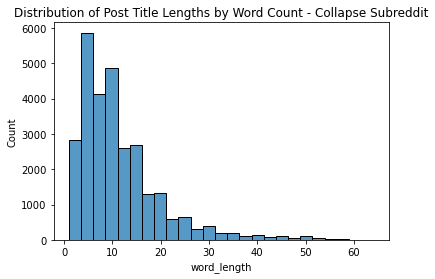

In [21]:
sns.histplot(df_col_cut['word_length'],bins=25)
plt.title('Distribution of Post Title Lengths by Word Count - Collapse Subreddit');

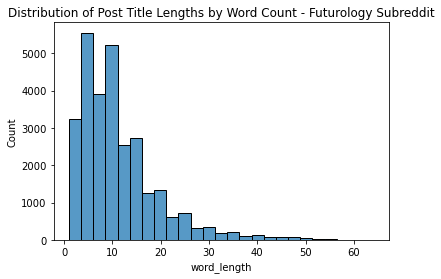

In [22]:
sns.histplot(df_fut_cut['word_length'],bins=25)
plt.title('Distribution of Post Title Lengths by Word Count - Futurology Subreddit');

### Combining Dataframes

In [23]:
len(df_fut_cut)

28763

In [24]:
len(df_col_cut)

28682

Concatenate the dataframe on top of one another.

In [25]:
df_comb = pd.concat([df_col_cut,df_fut_cut])

In [26]:
df_comb.shape

(57445, 4)

### Shuffling and Splitting Dataset into Holdout

Shuffles dataset.

In [27]:
df_comb = df_comb.sample(frac=1,random_state=2)

Creates holdout dataset.

In [28]:
df_holdout = df_comb[0:11523]
X_holdout = df_holdout['title']
y_holdout = df_holdout['subreddit']

In [29]:
df_main = df_comb[11523:]

In [30]:
df_holdout.shape, df_main.shape

((11523, 4), (45922, 4))

Using 30% of the dataset for initial analysis.

In [31]:
df_sample = df_main.sample(frac=0.3,random_state=2)

In [32]:
df_sample['subreddit'].value_counts(normalize=True)

collapse      0.500327
Futurology    0.499673
Name: subreddit, dtype: float64

Fairly even split of dataset.

In [33]:
df_sample['subreddit'].value_counts()

collapse      6893
Futurology    6884
Name: subreddit, dtype: int64

In [34]:
df_sample.to_csv('./datasets/df_sample.csv',index=False)
df_holdout.to_csv('./datasets/df_holdout.csv',index=False)
df_main.to_csv('./datasets/df_main.csv',index=False)